# Customer Segmentation using KMeans

### Import libraries

In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

### Load Data From CSV File  

In [2]:
df = pd.read_csv("customers.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [32]:
df.shape

(850, 10)

### Pre-processing

In [3]:
df = df [['Age','Income']]
df.head()

,Age,Income
0,41,19
1,47,100
2,33,57
3,29,19
4,47,253


In [4]:
# Standarize data
from sklearn.preprocessing import scale
df['Age'] = scale(df['Age'])
df['Income'] = scale(df['Income'])
df.head()

,Age,Income
0,0.742915,-0.718459
1,1.489490,1.384325
2,-0.252518,0.268032
3,-0.750235,-0.718459
4,1.489490,5.356249


### Modeling

In [16]:
clusterNum = 4
k_means = KMeans(n_clusters = clusterNum)
k_means.fit(df)
labels = k_means.labels_
print(labels[:100])

[0 2 1 1 3 0 0 0 1 2 2 1 1 0 1 1 1 0 0 1 1 0 1 0 2 0 1 0 0 1 2 0 1 0 1 1 1
 1 1 2 1 2 1 2 0 2 1 1 1 1 2 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1
 1 1 0 1 2 0 1 1 2 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1]


### Insights
We assign the labels to each row in dataframe.

In [17]:
df["cluster"] = labels
df.head(5)

,Age,Income,cluster
0,0.742915,-0.718459,0
1,1.489490,1.384325,2
2,-0.252518,0.268032,1
3,-0.750235,-0.718459,1
4,1.489490,5.356249,3


We can easily check the centroid values by averaging the features in each cluster.

In [18]:
df.groupby('cluster').mean()

,Age,Income
cluster,,
0,0.831854,-0.006647
1,-0.745990,-0.416566
2,1.167530,1.738683
3,1.439719,5.820938


In [19]:
k_means.cluster_centers_

array([[ 8.31854477e-01, -6.64713500e-03,  1.00000000e+00],
       [-7.45989851e-01, -4.16566463e-01, -3.33066907e-16],
       [ 1.16752999e+00,  1.73868261e+00,  1.51250000e+00],
       [ 1.43971882e+00,  5.82093781e+00,  2.00000000e+00]])

In [20]:
df.cluster.value_counts()

1    469
0    291
2     80
3     10
Name: cluster, dtype: int64

Now, lets look at the distribution of customers based on their age and income:

In [21]:
centers = k_means.cluster_centers_

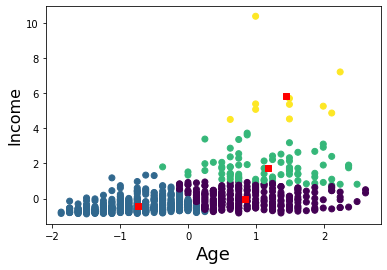

In [22]:
plt.scatter(df['Age'], df['Income'], c=labels.astype(np.float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.scatter(centers[:,0],centers[:,1], c="red",marker="s" )
plt.show()

In [23]:
k_means.inertia_    # Sum of squared distances of samples to their closest cluster center (centroid)

465.7720100885419

In [42]:
cost = []
for k in range(2,10):
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(df)
   cost.append(kmeans.inertia_)   

Text(0, 0.5, 'Inertia (Cost)')

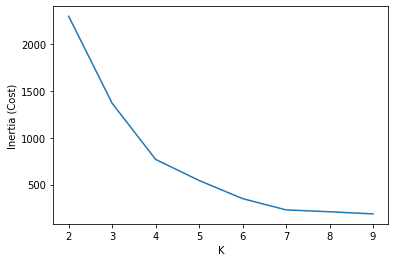

In [43]:
plt.plot(range(2,10), cost)
plt.xlabel("K")
plt.ylabel("Inertia (Cost)")